In [1]:
import os

import contextily as ctx
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from matplotlib import cm

In [2]:
enriched_points = dd.read_csv(
    "./anglova_metrics_enriched/points_enriched_metrics.csv",
).compute()
enriched_points["t"] = pd.to_datetime(enriched_points["t"])
enriched_trajectories_df = pd.read_csv(
    "./anglova_metrics_enriched/trajectories_enriched_metrics.csv",
)
pair_wise_distances = enriched_points = dd.read_csv(
    "./pairwise_distances.csv",
).compute()


In [3]:
output_path = "./assets/Connectivity/"
pallete = "Set1"
pallete2 = "Set2"

In [4]:
def save_plot(filename):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(
        f"{output_path}/{filename}.png",
        bbox_inches="tight",
    )
    plt.savefig(
        f"{output_path}/{filename}.pdf",
        bbox_inches="tight",
    )

In [5]:
cud_okabe_ito_colors = [
    "#E69F00",  # orange
    "#56B4E9",  # sky blue
    "#009E73",  # green
    "#F0E442",  # yellow
    "#0072B2",  # blue
    "#D55E00",  # reddish orange
    "#CC79A7",  # purple
    "#000000",  # black
]

C:\Users\edgar\AppData\Local\Temp\ipykernel_2116\805195761.py:21: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .resample(time_interval)['distance']


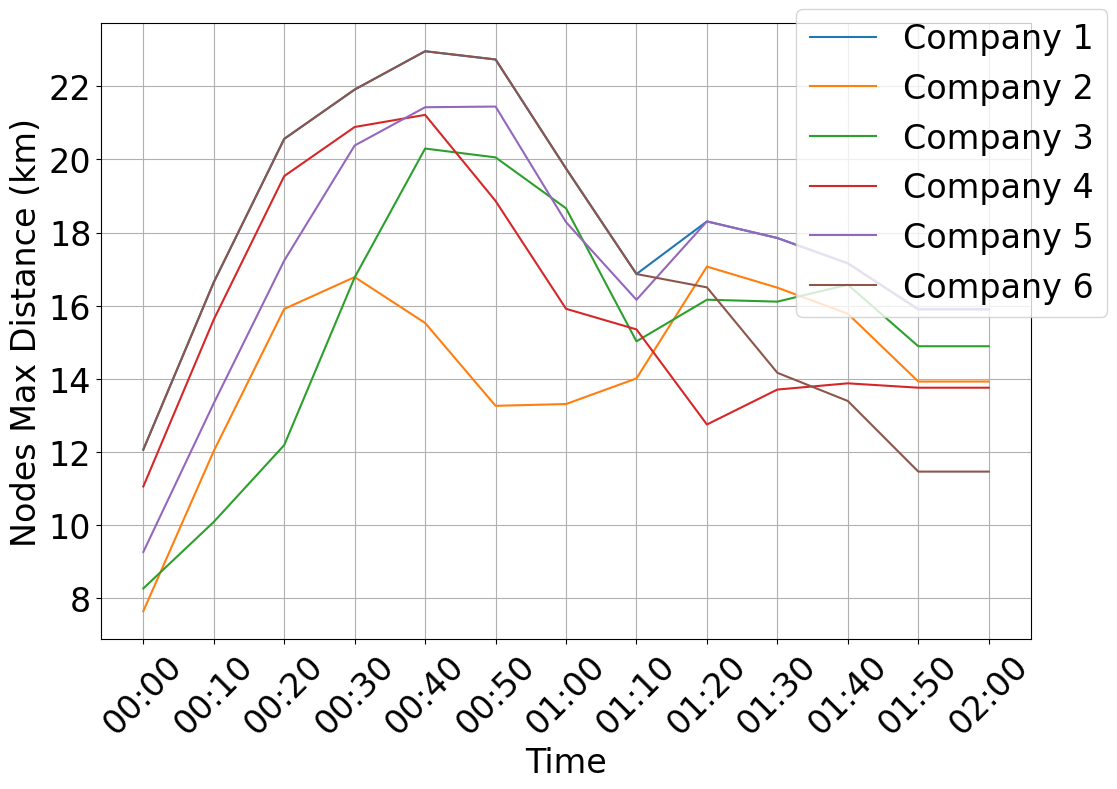

In [ ]:
# Combine data for both companies and plot in one figure

# Convert the 't' column to datetime if not already done
pair_wise_distances['t'] = pd.to_datetime(pair_wise_distances['t'])

# Set the time interval (e.g., 10 minutes)
time_interval = '10T'

# Create a dictionary to store max distances for each company
max_distances_by_company = {}
plt.rcParams.update({'font.size': 24})
# Process data for each company
for company in enriched_trajectories_df["Company"].unique():
    company_ids = enriched_trajectories_df[enriched_trajectories_df["Company"] == company]["trajectory_id"]
    filtered_rows = pair_wise_distances[
        pair_wise_distances["id1"].isin(company_ids) | pair_wise_distances["id2"].isin(company_ids)
    ]
    max_distances_by_company[company] = (
        filtered_rows
        .set_index('t')
        .resample(time_interval)['distance']
        .max()
    )

# Plot the results
plt.figure(figsize=(12, 8))
for company, max_distances in max_distances_by_company.items():
    max_distances.index = max_distances.index.strftime('%H:%M')
    plt.plot(
        max_distances.index,
        max_distances,
        label=f'Company {company}'
    )

# plt.title("Maximum Distances Over Time (10-minute intervals)")
plt.xlabel("Time")
plt.xticks(rotation=45)
plt.ylabel("Nodes Max Distance (km)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
plt.grid()
save_plot("Company_Max_Distances_Over_Time")
plt.show()

In [6]:
# Plot the variation of values for companies over time
plt.figure(figsize=(12, 8))
for company, max_distances in max_distances_by_company.items():
    max_distances.index = pd.to_datetime(max_distances.index, format='%H:%M')
    plt.plot(
        max_distances.index,
        max_distances.diff(),  # Calculate the variation (difference) over time
        label=f'Company {company}'
    )

plt.xlabel("Time")
plt.xticks(rotation=45)
plt.ylabel("Variation in Max Distance (km)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
plt.grid()
save_plot("Company_Variation_Over_Time")
plt.show()

NameError: name 'max_distances_by_company' is not defined

<Figure size 1200x800 with 0 Axes>